Decision Tree(n=1) Test Score
 0.9355156946439169
AdaBoost(n_estimators=300) Test Score
 0.978035747157063
Bagging(n_estimators=300) Test Score
 0.9553721842402053


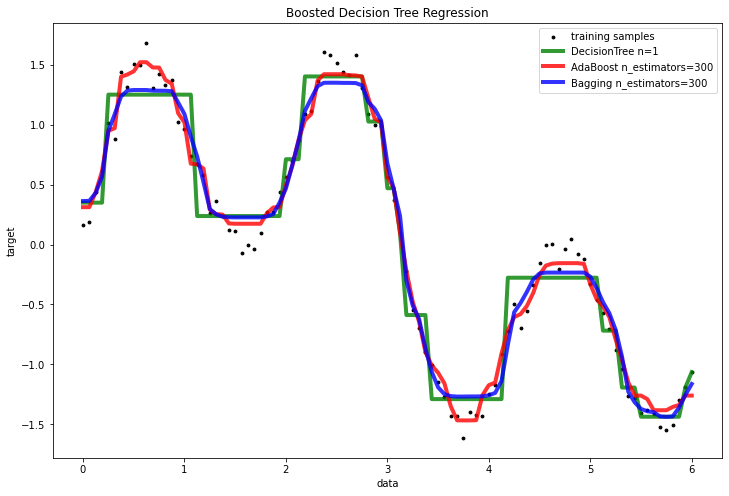

In [1]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

# 创建数据集
rs = np.random.RandomState(1)
X_train = np.linspace(0, 6, 97)[:, np.newaxis]
Y_train = np.sin(X_train).ravel() + np.sin(3 * X_train).ravel() + rs.randn(X_train.shape[0]) * 0.1
X_test = np.linspace(0, 5, 17)[:, np.newaxis]
Y_test = np.sin(X_test).ravel() + np.sin(3 * X_test).ravel() + rs.randn(X_test.shape[0]) * 0.1

regr_1 = DecisionTreeRegressor(max_depth=4)
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rs)
regr_3 = BaggingRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rs)

# 训练学习器
regr_1.fit(X_train, Y_train)
regr_2.fit(X_train, Y_train)
regr_3.fit(X_train, Y_train)

# 学习器评分
print("Decision Tree(n=1) Test Score\n", regr_1.score(X_test, Y_test))
print("AdaBoost(n_estimators=300) Test Score\n", regr_2.score(X_test, Y_test))
print("Bagging(n_estimators=300) Test Score\n", regr_3.score(X_test, Y_test))

# 预测
y_1 = regr_1.predict(X_train)
y_2 = regr_2.predict(X_train)
y_3 = regr_3.predict(X_train)
# 拟合可视化
plt.figure(num=1, figsize=(12, 8))
plt.scatter(X_train, Y_train, c="black", s=8, label="training samples")
plt.plot(X_train, y_1, c="g", label="DecisionTree n=1", linewidth=4, alpha=0.8)
plt.plot(X_train, y_2, c="r", label="AdaBoost n_estimators=300", linewidth=4, alpha=0.8)
plt.plot(X_train, y_3, c="b", label="Bagging n_estimators=300", linewidth=4, alpha=0.8)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()
